In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("In-Hospital-Mortality.csv")

In [3]:
df = df.drop(['ID'], axis=1)

In [4]:
df.shape

(1177, 50)

###### We have 1177 rows and 50 columns

In [5]:
df.describe()

,group,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1177.000000,1176.000000,1177.000000,1177.000000,962.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,...,1177.000000,1176.000000,1177.000000,1177.000000,1177.000000,885.000000,1177.000000,948.000000,883.000000,1177.000000
mean,1.299065,0.135204,74.055225,1.525064,30.188278,0.717927,0.451147,0.085811,0.421410,0.338997,...,138.890016,8.500894,102.283835,13.925094,2.120169,7.378532,26.911766,1.853426,45.535382,48.715378
std,0.458043,0.342087,13.434061,0.499584,9.325997,0.450200,0.497819,0.280204,0.493995,0.473570,...,4.151347,0.572263,5.339733,2.652732,0.251532,0.067320,5.167512,0.983819,12.711271,12.868436
min,1.000000,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,0.000000,...,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,1.000000,0.000000,65.000000,1.000000,24.326461,0.000000,0.000000,0.000000,0.000000,0.000000,...,136.666667,8.148864,99.000000,12.250000,1.955556,7.334615,23.454545,1.200000,37.038462,40.000000
50%,1.000000,0.000000,77.000000,2.000000,28.312474,1.000000,0.000000,0.000000,0.000000,0.000000,...,139.250000,8.500000,102.500000,13.666667,2.092308,7.380000,26.500000,1.600000,43.000000,55.000000
75%,2.000000,0.000000,85.000000,2.000000,33.633509,1.000000,1.000000,0.000000,1.000000,1.000000,...,141.600000,8.869063,105.571429,15.416667,2.241667,7.430000,29.875000,2.200000,50.585784,55.000000
max,2.000000,1.000000,99.000000,2.000000,104.970366,1.000000,1.000000,1.000000,1.000000,1.000000,...,154.736842,10.950000,122.526316,25.500000,4.072727,7.580000,47.666667,8.333333,98.600000,75.000000


In [6]:
df.nunique()

group                          2
outcome                        2
age                           68
gendera                        2
BMI                          933
hypertensive                   2
atrialfibrillation             2
CHD with no MI                 2
diabetes                       2
deficiencyanemias              2
depression                     2
Hyperlipemia                   2
Renal failure                  2
COPD                           2
heart rate                  1094
Systolic blood pressure     1102
Diastolic blood pressure    1077
Respiratory rate            1004
temperature                  775
SP O2                        866
Urine output                 810
hematocrit                  1056
RBC                         1045
MCH                          926
MCHC                         803
MCV                          601
RDW                          836
Leucocyte                    983
Platelets                   1085
Neutrophils                  635
Basophils 

In [7]:
mis_val = df.isnull().sum()
mis_val_percent = 100 * df.isnull().sum() / len(df)
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(
columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns = mis_val_table_ren_columns[
mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
'% of Total Values', ascending=False).round(1)
print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
"There are " + str(mis_val_table_ren_columns.shape[0])+" columns that have missing values.")
print(mis_val_table_ren_columns)

Your selected dataframe has 50 columns.
There are 20 columns that have missing values.
                          Missing Values  % of Total Values
PCO2                                 294               25.0
PH                                   292               24.8
Basophils                            259               22.0
Lactic acid                          229               19.5
BMI                                  215               18.3
Creatine kinase                      165               14.0
Lymphocyte                           145               12.3
Neutrophils                          144               12.2
Urine output                          36                3.1
INR                                   20                1.7
PT                                    20                1.7
temperature                           19                1.6
glucose                               18                1.5
Systolic blood pressure               16                1.4
Diastolic blo

<Axes: xlabel='BMI'>

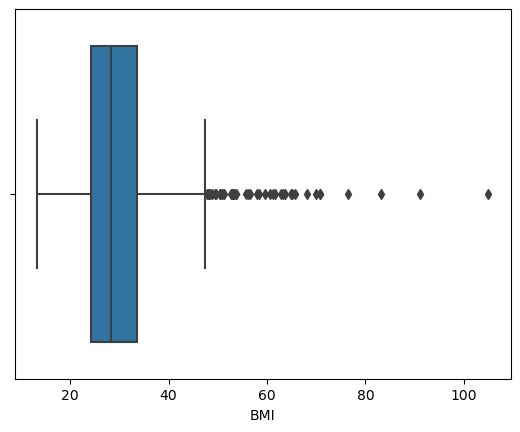

In [8]:
sns.boxplot(x=df["BMI"])

###### there are outliers So Considering median for NA values

In [9]:
df.isnull().sum(axis = 0)

group                         0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophils                   259
Lymphocy

In [10]:
df = df.dropna()

In [11]:
df.shape

(428, 50)

##### We heave 428 rows and 49 columns in our dataset 

In [12]:
df.keys()

Index(['group', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

In [13]:
len(df[df["group"]==1])

301

###### we will be having 301 rows in  our training dataset

In [14]:
len(df[df["group"]==2])

127

###### we will be having 127 rows in  our testing dataset

#### 0 - Alive        1-Death


Text(0.5, 1.0, 'Death vs Alive')

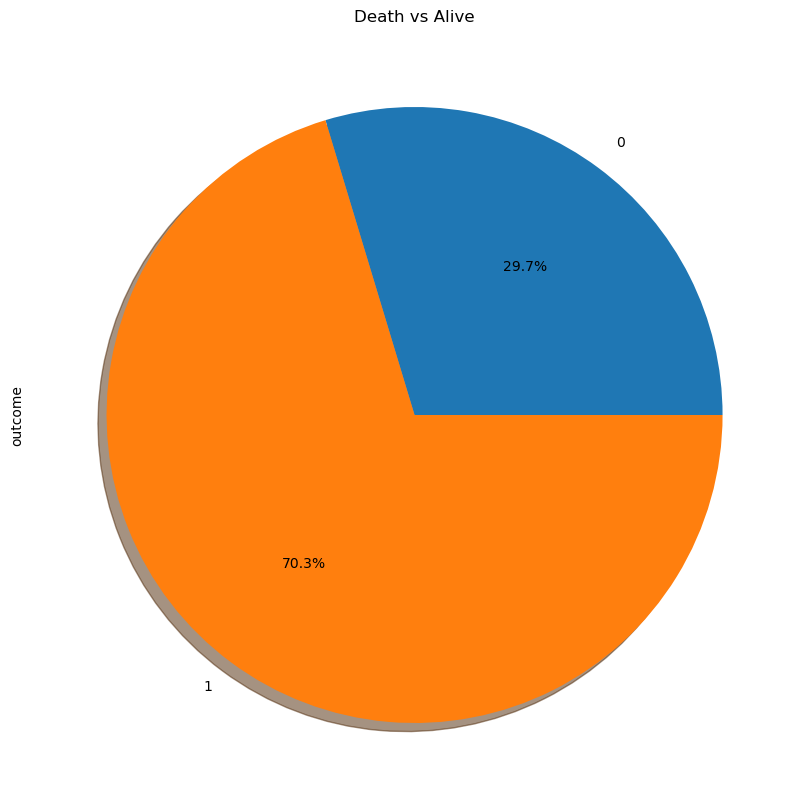

In [15]:
df.groupby('hypertensive')["outcome"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10))
plt.title("Death vs Alive")



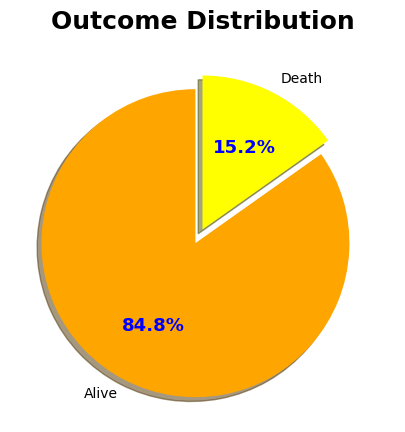

In [17]:
fig, ax = plt.subplots(figsize=(8,5), dpi=100)

patches, texts, autotexts = ax.pie(df['outcome'].value_counts(), autopct= '%1.1f%%', shadow=True, 
                                   startangle=90, explode=(0.1, 0), labels=['Alive','Death'], colors=['orange','yellow'])

plt.setp(autotexts, size=13, color = 'blue', weight='bold')
autotexts[1].set_color('blue');

plt.title('Outcome Distribution', fontsize=18, fontweight='bold')
plt.show()

In [18]:
d = df[df['outcome']==1]
len(df[df['outcome']==1])

65

##  Number Of patient facing depression

In [19]:
len(d[d['depression'] == 1 ])

3

## Number Of patient facing Renal failure

In [20]:
len(d[d['Renal failure'] == 1 ])

12

## Number Of patient facing Hyperlipemia

In [21]:
len(d[d['Hyperlipemia'] == 1 ])

26

## Number Of patient facing deficiencyanemias

In [22]:
len(d[d['deficiencyanemias'] == 1 ])

11

## Number of patient having diabetes

In [23]:
len(d[d['diabetes'] == 1 ])

26

In [24]:
len(d[d['atrialfibrillation'] == 1])

33

In [25]:
numerical_features = [features for features in df.columns if len(df[features].unique())>3]
categorical_features = [features for features in df.columns if features not in numerical_features]

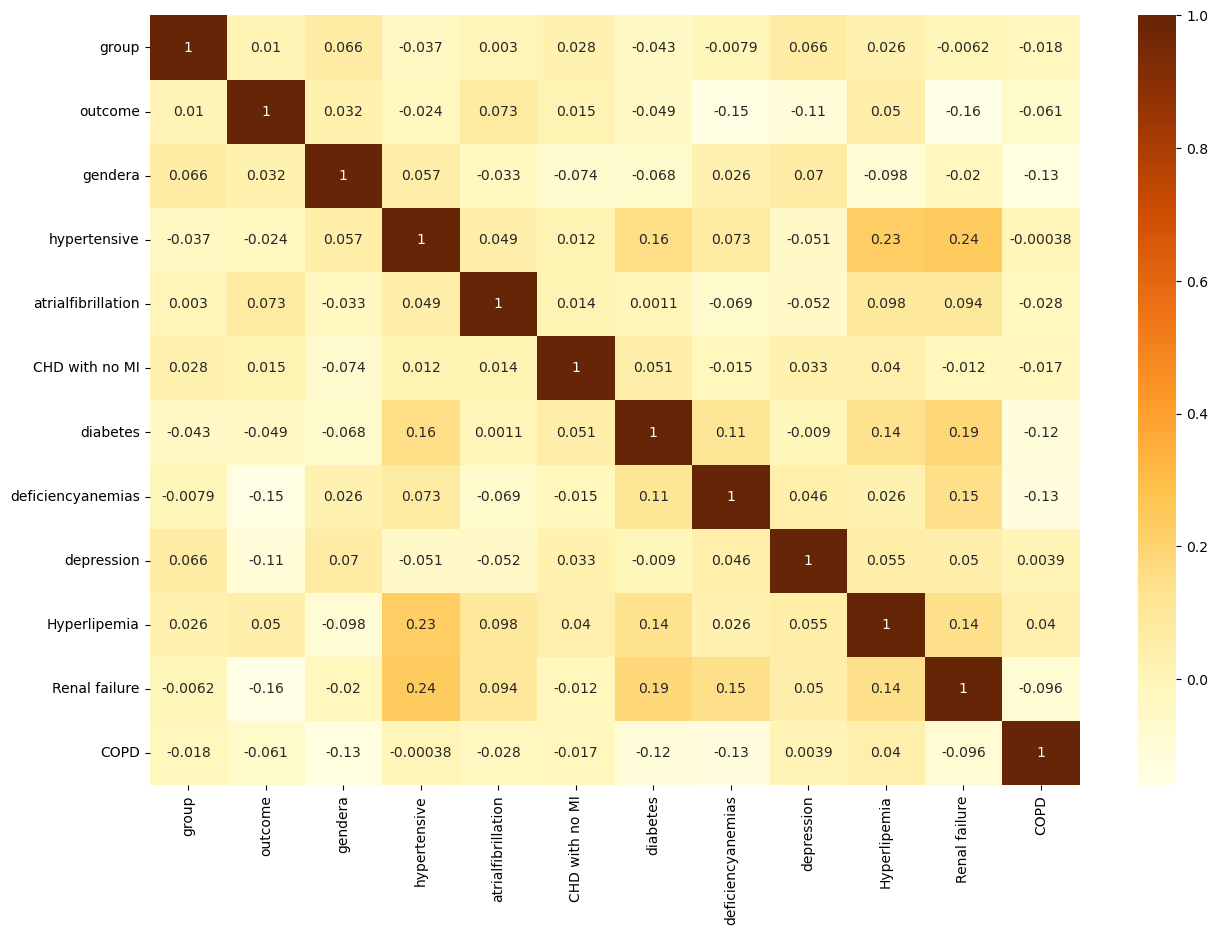

In [26]:
corr = df[categorical_features].corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='YlOrBr');

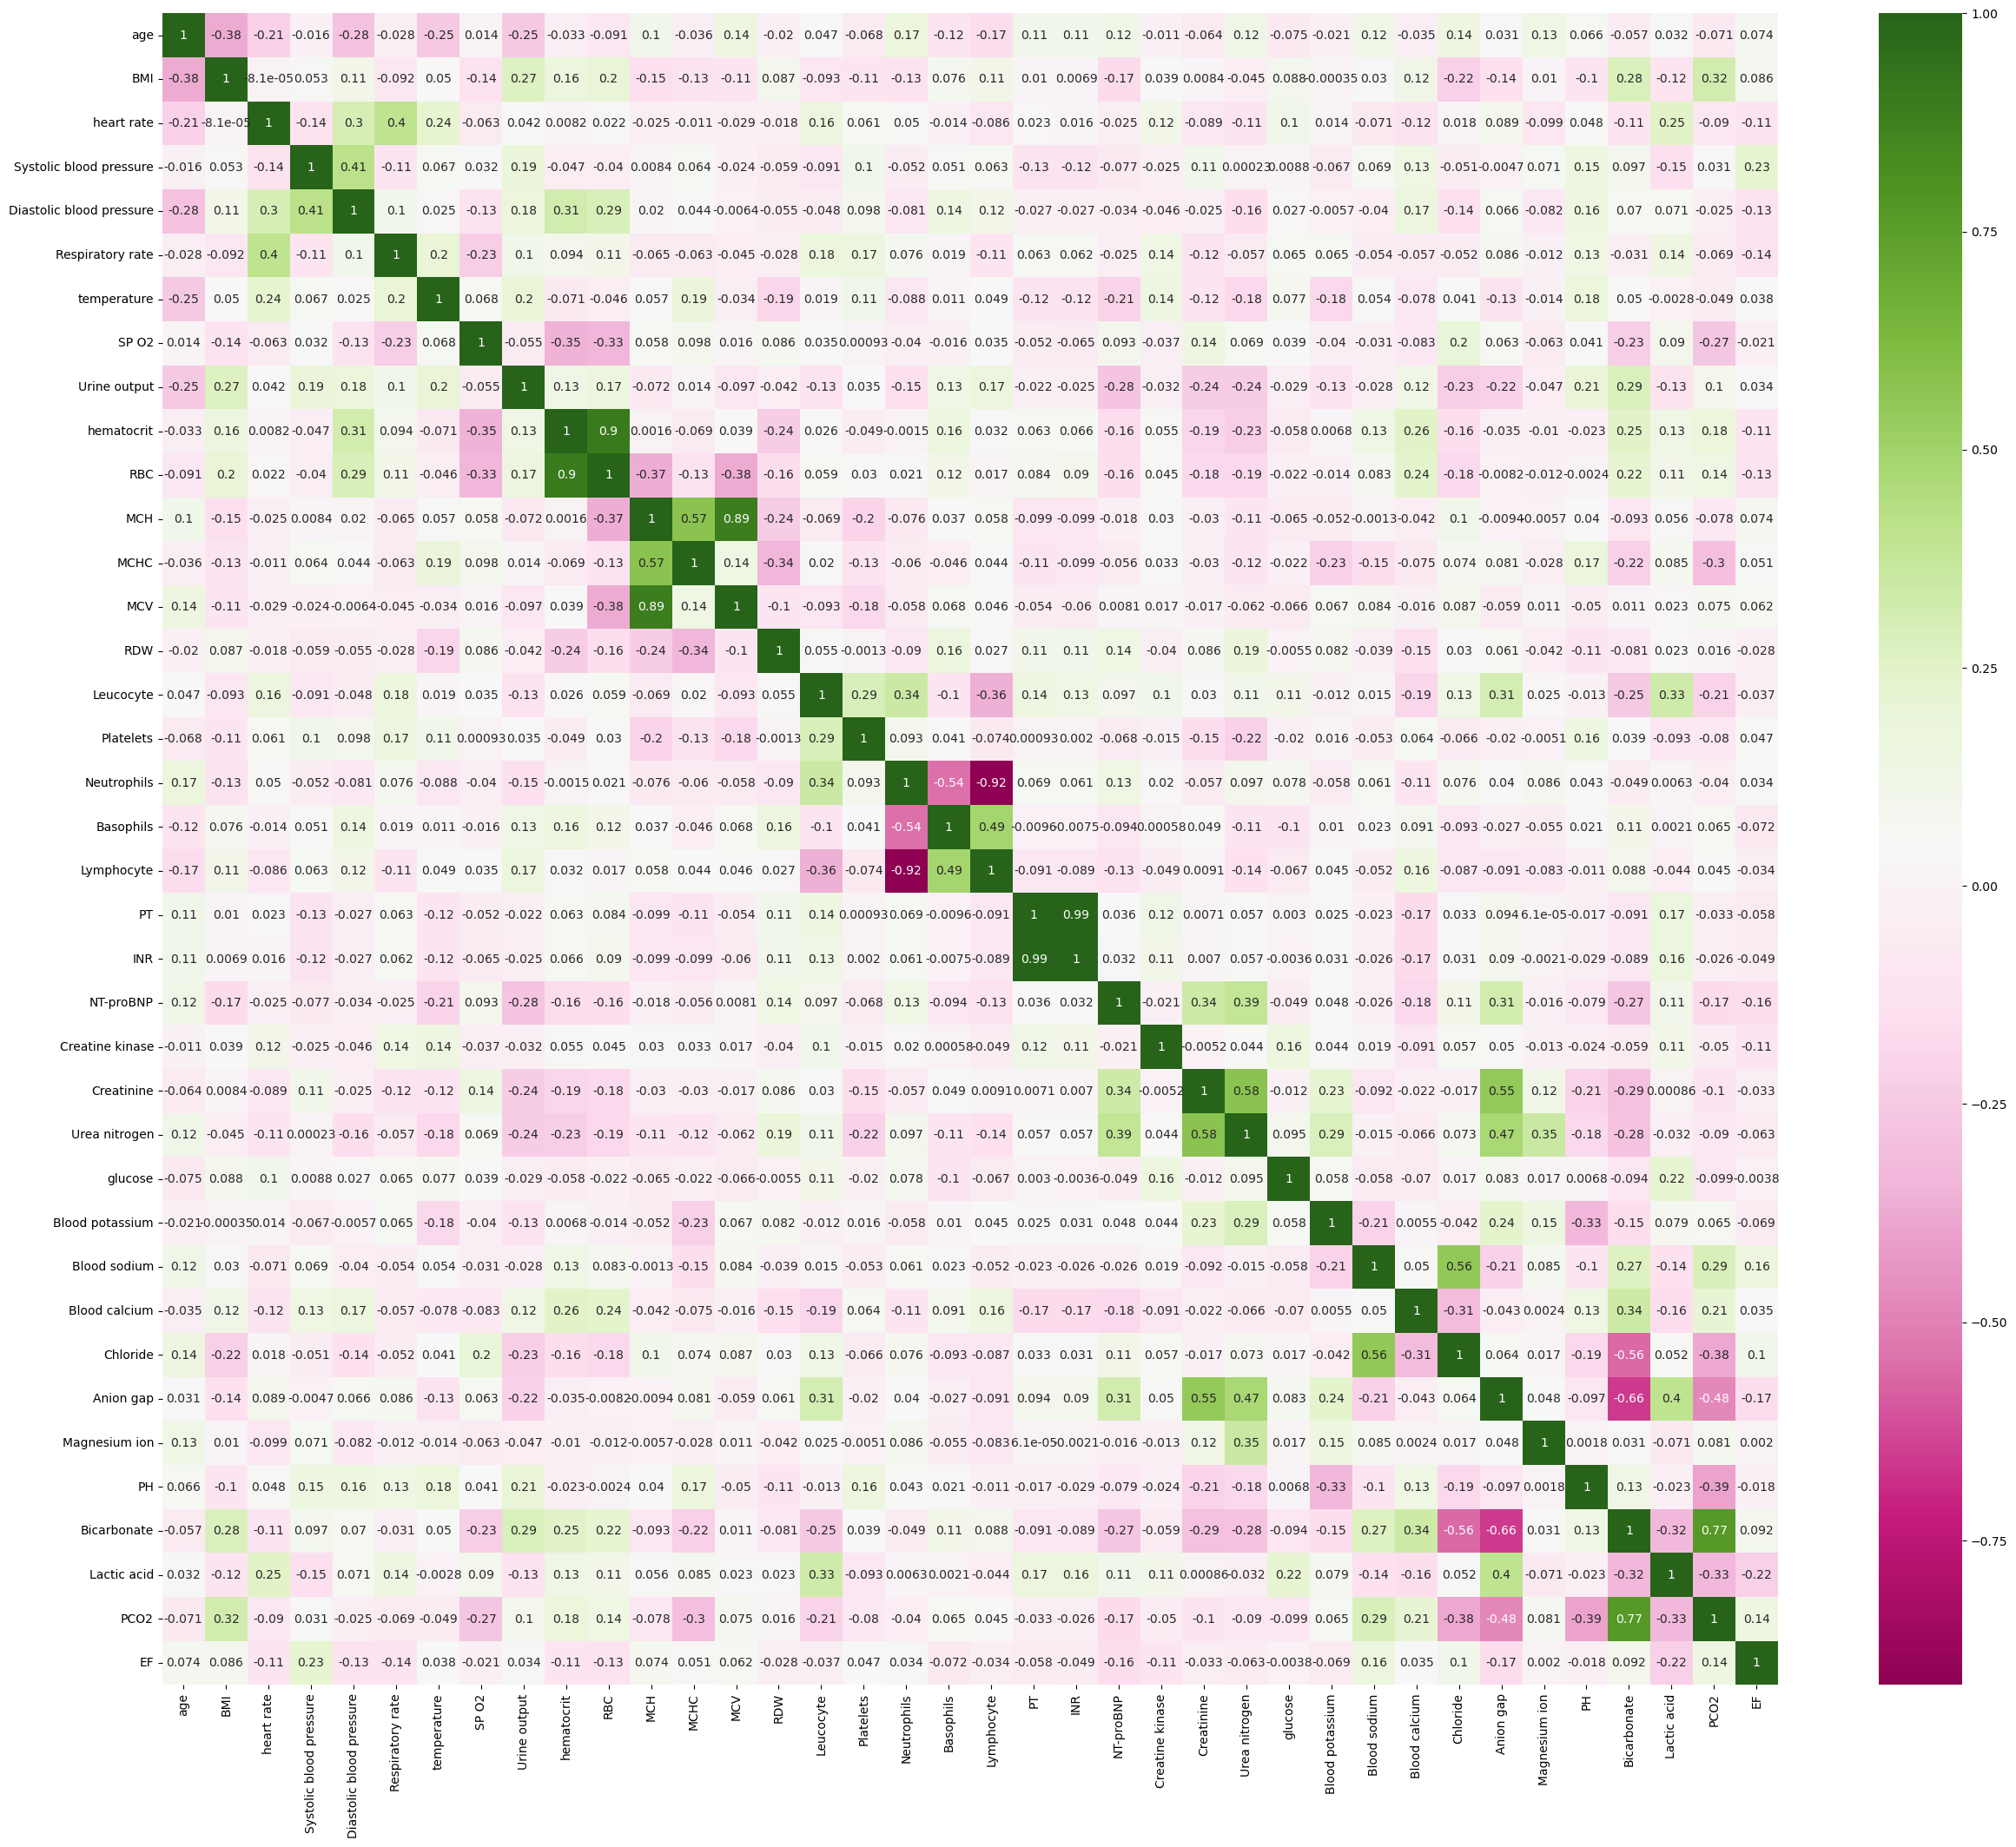

In [27]:
cor = df[numerical_features].corr()
plt.figure(figsize=(30,25))
sns.heatmap(cor, annot=True, cmap='PiYG');

In [28]:
train = df.query("group==1")
test = df.query("group==2")
df_target=df['outcome']
train = train.drop(['group'], axis=1)
test = test.drop(['group'], axis=1)

In [29]:
Y_train = train['outcome']
Y_test = test['outcome']

In [30]:
X_train = train.drop('outcome',axis = 1)
X_test = test.drop('outcome',axis = 1)

In [31]:
#Y_train

In [32]:
#X_train

In [33]:
#X_test

In [34]:
#Y_test

### K-NN

#### K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

In [35]:
myKNN = KNeighborsClassifier(n_neighbors = 1)
model = myKNN.fit(X_train, Y_train)
y_pred = myKNN.predict(X_test)

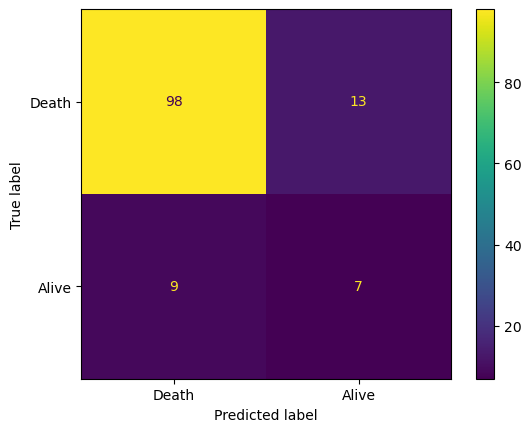

In [36]:
cm = confusion_matrix(y_pred,Y_test, labels=model.classes_)
disp=ConfusionMatrixDisplay(cm,display_labels =['Death','Alive']).plot()

In [37]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90       107
         1.0       0.44      0.35      0.39        20

    accuracy                           0.83       127
   macro avg       0.66      0.63      0.64       127
weighted avg       0.81      0.83      0.82       127



### Decision Tree

####  A algorithm that uses a decision tree to make predictions. It follows a tree-like model of decisions and their possible consequences. The algorithm works by recursively splitting the data into subsets based on the most significant feature at each node of the tree

In [38]:
dtree = DecisionTreeClassifier()
model=dtree.fit(X_train, Y_train)
y_predict = dtree.predict(X_test)

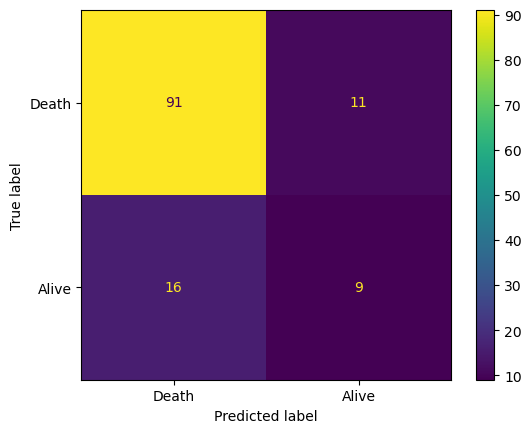

In [39]:
cm = confusion_matrix(y_predict,Y_test, labels=model.classes_)
disp=ConfusionMatrixDisplay(cm,display_labels =['Death','Alive']).plot()

In [40]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       107
         1.0       0.36      0.45      0.40        20

    accuracy                           0.79       127
   macro avg       0.63      0.65      0.64       127
weighted avg       0.81      0.79      0.80       127



### Random Forest 

#### A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [41]:
    rforest = RandomForestClassifier(n_estimators = 300)
    rforest.fit(X_train, Y_train)
    y_pred = rforest.predict(X_test)

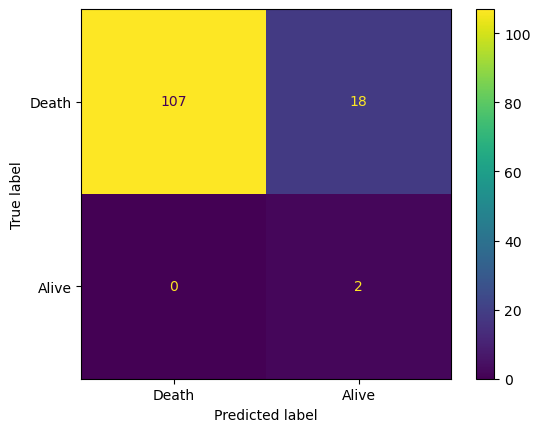

In [42]:
cm = confusion_matrix(y_pred,Y_test, labels=model.classes_)
disp=ConfusionMatrixDisplay(cm,display_labels =['Death','Alive']).plot()

In [43]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92       107
         1.0       1.00      0.10      0.18        20

    accuracy                           0.86       127
   macro avg       0.93      0.55      0.55       127
weighted avg       0.88      0.86      0.81       127



### Naive Bayes

####  Naive Bayes algorithm is based on the Bayes’ theorem, it is a probabilistic classifier

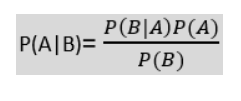

In [44]:
model = GaussianNB()
model.fit(X_test,Y_test)
y_pred = model.predict(X_test)

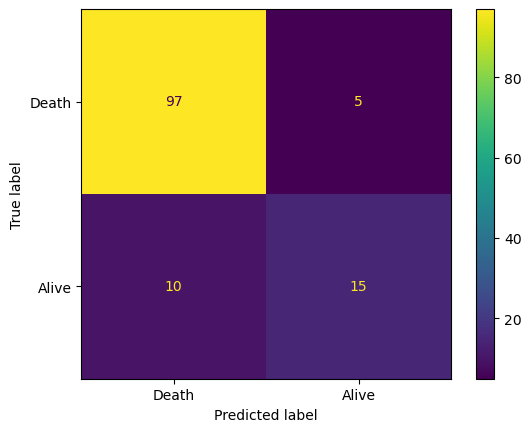

In [45]:
cm = confusion_matrix(y_pred,Y_test, labels=model.classes_)
disp=ConfusionMatrixDisplay(cm,display_labels =['Death','Alive']).plot()


In [46]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       107
         1.0       0.60      0.75      0.67        20

    accuracy                           0.88       127
   macro avg       0.78      0.83      0.80       127
weighted avg       0.90      0.88      0.89       127



### Logistics 

#### Logistic Regression algorithm that  used for classification problems and based on the concept of probability. It is used when the dependent variable (target) is categorical

In [47]:
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)

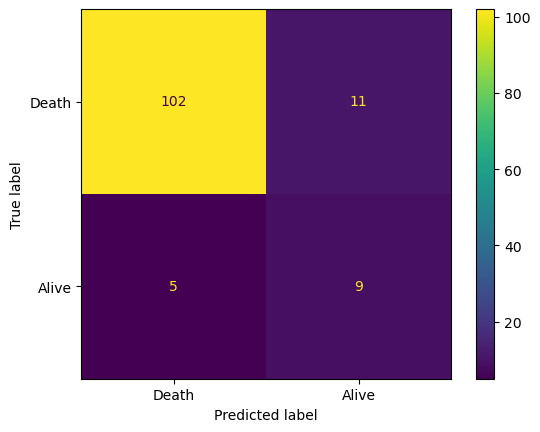

In [48]:
cm = confusion_matrix(predictions,Y_test, labels=model.classes_)
disp=ConfusionMatrixDisplay(cm,display_labels =['Death','Alive']).plot()


In [49]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93       107
         1.0       0.64      0.45      0.53        20

    accuracy                           0.87       127
   macro avg       0.77      0.70      0.73       127
weighted avg       0.86      0.87      0.86       127



### SVM

#### In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is the number of features you have), with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the optimal hyper-plane that differentiates the two classes very well

In [50]:
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)

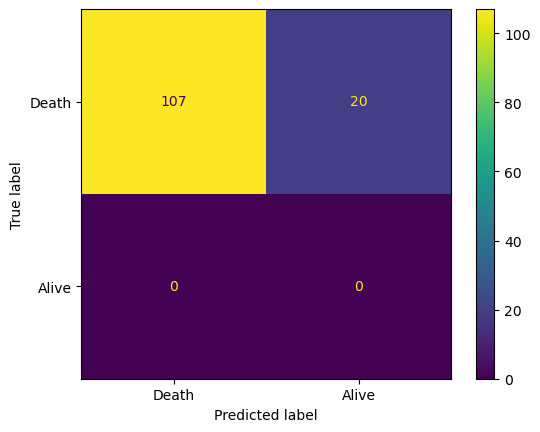

In [51]:
cm = confusion_matrix(y_pred,Y_test, labels=model.classes_)
disp=ConfusionMatrixDisplay(cm,display_labels =['Death','Alive']).plot()

In [52]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       107
         1.0       0.00      0.00      0.00        20

    accuracy                           0.84       127
   macro avg       0.42      0.50      0.46       127
weighted avg       0.71      0.84      0.77       127



C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### XG-Boost


####  It is an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction. XGBoost stands for “Extreme Gradient Boosting”.

In [53]:
import xgboost as xgb
my_model = xgb.XGBClassifier()
my_model.fit(X_train, Y_train)
y_predxg = my_model.predict(X_test)

In [54]:
print(classification_report(Y_test,y_predxg))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       107
         1.0       0.73      0.55      0.63        20

    accuracy                           0.90       127
   macro avg       0.83      0.76      0.78       127
weighted avg       0.89      0.90      0.89       127



In [55]:
accuracy_score(Y_test,y_predxg)*100

89.76377952755905

## Comparing Classifiers

In [56]:
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
XG  = xgb.XGBClassifier()
SVC = SVC(kernel='rbf', random_state = 1)
LIG = LogisticRegression(solver='liblinear')

In [57]:
from sklearn.metrics import accuracy_score
li = [DTR,RFR,KNR,XG,SVC,LIG]
d = {}
for i in li:
    i.fit(X_train,Y_train)
    ypred = i.predict(X_test)
    print(i,":",accuracy_score(Y_test,ypred)*100)
    d.update({str(i):i.score(X_test,Y_test)*100})

DecisionTreeClassifier() : 77.95275590551181
RandomForestClassifier() : 85.8267716535433
KNeighborsClassifier() : 86.61417322834646
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 89.76377952755905
SVC(random_state=1) : 84.25196850393701
LogisticRegression(solver='liblinear') : 87.401574803149

## Ensemble  Model

#### Ensemble modeling is a process where multiple diverse models are created to predict an outcome, either by using many different modeling algorithms or using different training data sets

In [63]:
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression(random_state=42)
clf2 = KNeighborsClassifier()
clf3 = GaussianNB()
clf5 = RandomForestClassifier(random_state=42)
clf6 = xgb.XGBClassifier()

eclf = VotingClassifier(estimators=[('LR', clf1), ('KNN', clf2), ('GNB', clf3),('RFT',clf5),('xg',clf6)],
                        voting='soft')
eclf.fit(X_train, Y_train)

Y_pred = eclf.predict(X_test)

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       107
         1.0       1.00      0.25      0.40        20

    accuracy                           0.88       127
   macro avg       0.94      0.62      0.67       127
weighted avg       0.90      0.88      0.85       127



In [77]:
accuracy_score(Y_test,Y_pred)*100

88.18897637795276

# By: SARVAGY JAIN 